In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
blobs = pd.read_csv("../DATA/cluster_blobs.csv")

In [5]:
blobs.head(10)

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479
5,-6.010190,5.091339
6,1.066864,-8.146955
7,6.516789,6.649863
8,5.133780,5.525237
9,-6.809855,4.935899


<Axes: xlabel='X1', ylabel='X2'>

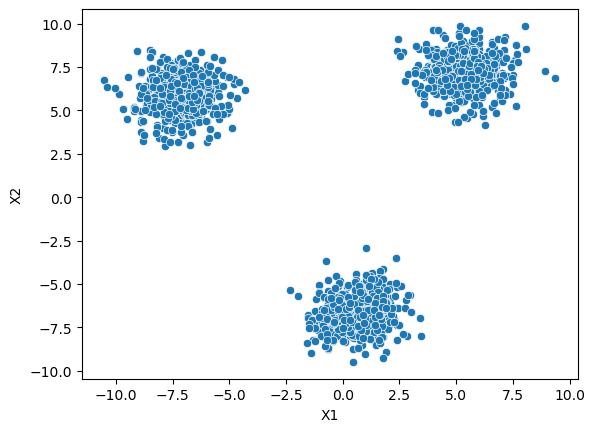

In [7]:
sns.scatterplot(data=blobs, x="X1", y="X2")

In [9]:
moons = pd.read_csv("../DATA/cluster_moons.csv")

In [11]:
moons.head(10)

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164
5,1.355112,-0.497306
6,0.776593,-0.396810
7,0.797612,-0.462623
8,0.105954,-0.046740
9,0.530580,0.805820


<Axes: xlabel='X1', ylabel='X2'>

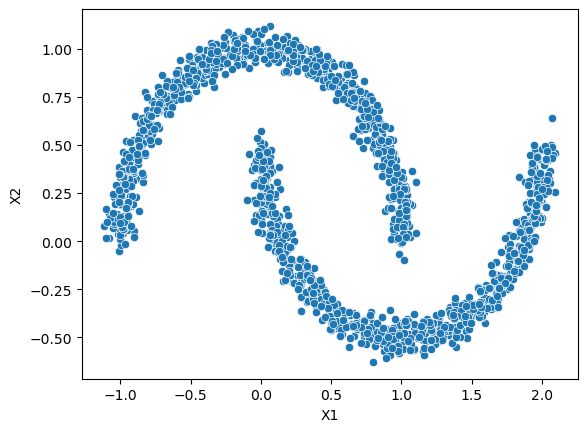

In [13]:
sns.scatterplot(data=moons, x="X1", y="X2")

In [15]:
circles = pd.read_csv("../DATA/cluster_circles.csv")

In [17]:
circles.head(10)

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354
5,0.985711,-0.469394
6,0.643907,-0.811431
7,0.187775,-0.985633
8,0.525441,-0.875320
9,-0.913068,-0.071105


<Axes: xlabel='X1', ylabel='X2'>

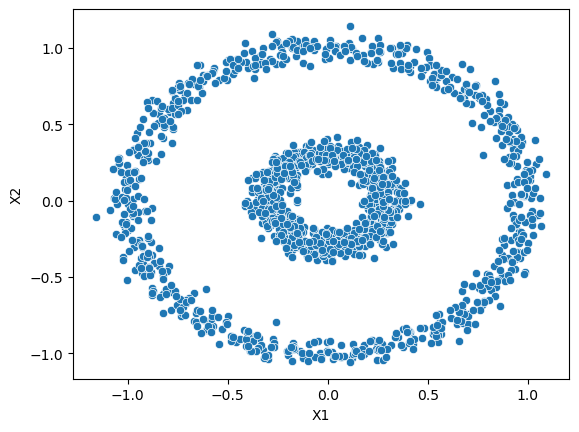

In [19]:
sns.scatterplot(data=circles, x="X1", y="X2")

In [21]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x="X1", y="X2", hue=labels, palette="Set1")

In [23]:
from sklearn.cluster import KMeans

In [41]:
model = KMeans(n_clusters=2)

C:\Users\honer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


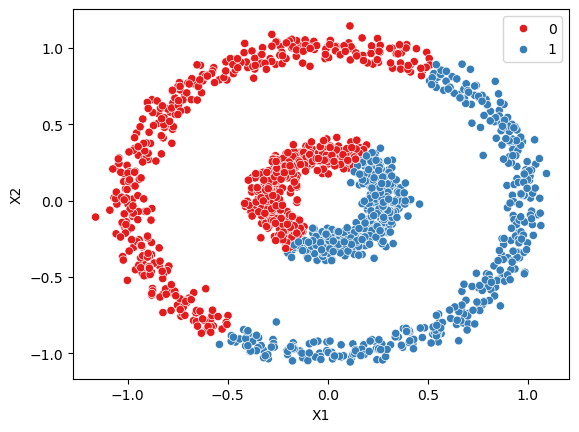

In [51]:
display_categories(model, circles)

In [53]:
from sklearn.cluster import DBSCAN

In [55]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |
 |  The worst case memory complexity of DBSCAN is :math:`O({n}^2)`, which can
 |  occur when the `eps` param is large and `min_samples` is low.
 |
 |  Read more in the :ref:`User Guide <dbscan>`.
 |
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. Th

In [65]:
model = DBSCAN(eps=0.15)

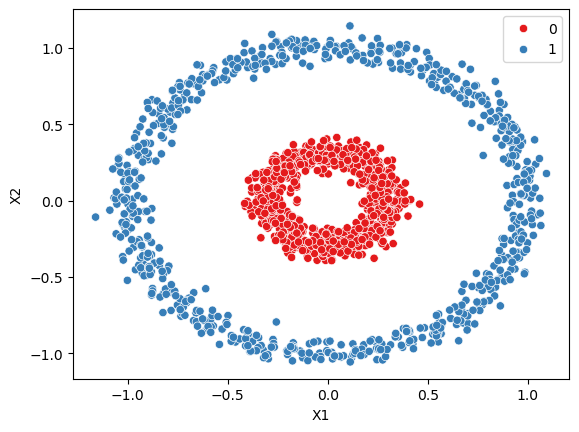

In [69]:
display_categories(model, circles)

In [71]:
two_blobs = pd.read_csv("../DATA/cluster_two_blobs.csv")

In [73]:
two_blobs_outliers = pd.read_csv("../DATA/cluster_two_blobs_outliers.csv")

<Axes: xlabel='X1', ylabel='X2'>

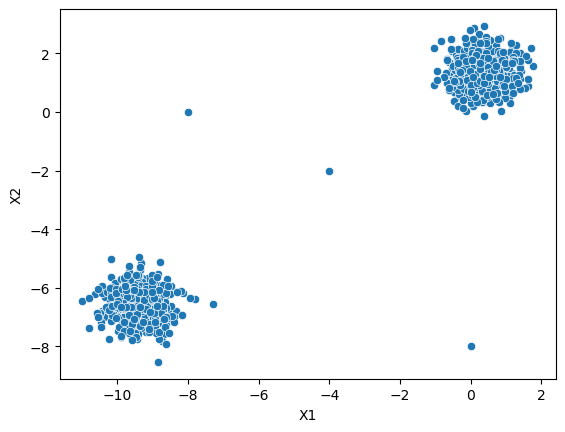

In [77]:
sns.scatterplot(data=two_blobs_outliers, x="X1", y="X2")

In [79]:
dbscan = DBSCAN()

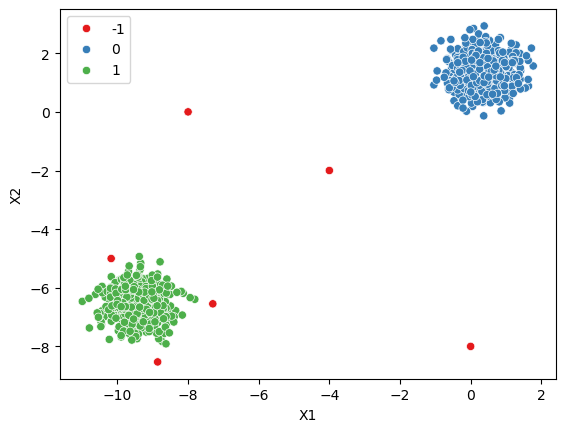

In [83]:
display_categories(dbscan, two_blobs_outliers)

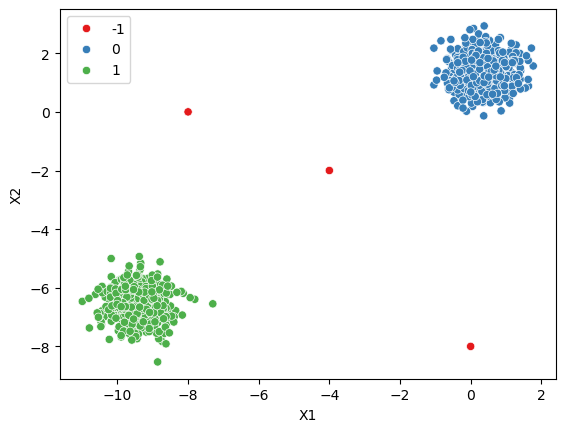

In [129]:

dbscan = DBSCAN(eps=0.75)
display_categories(dbscan, two_blobs_outliers)

In [95]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [107]:
outlier_percent = []
num_of_outliers = []

for eps in np.linspace(0.001, 7, 200):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)

    num_of_outliers.append(np.sum(dbscan.labels_ == -1))
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

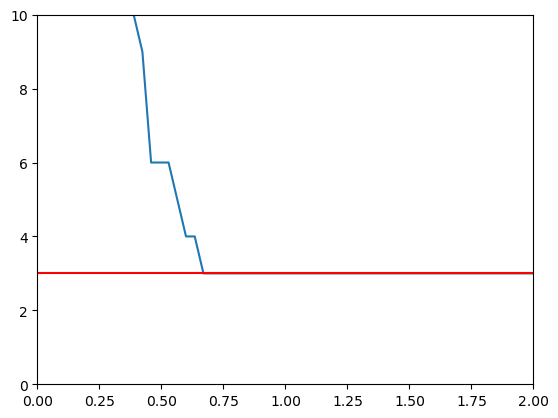

In [123]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y=num_of_outliers)
plt.xlim(0, 2)
plt.ylim(0, 10)
plt.hlines(y=3, xmin=0, xmax=2, color="red")